In [82]:
import numpy as np
import pandas as pd
from scipy.stats import uniform, norm, expon

# Question 1

Branch banks must keep enough money on hand to satisfy customers' cash demands. An
armored truck delivers cash to the bank once a week. The bank manager can choose the
amount of weekly cash to have delivered. Running out of cash during the week is terrible
customer service and the manager wants to avoid this. On the other hand, keeping excessive
cash reserves costs the bank profits, since cash is a non-interest earning asset.


The daily demand for cash at this particular bank follows a normal distribution with daily means and std dev summarized in Table 1.

**Table 1:**

|Info|Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|
|----|------|-------|---------|--------|------|--------|------|
|Mean (\\$1,000s)|175|120|90|60|120|140|65|
|Std_Dev (\\$1,000s)|26|18|13|9|18|21|9|


### (a)

In [58]:
daily = {'Monday':{'Mean': 175, "Std": 26},
        'Tuesday':{'Mean': 120, "Std": 18},
        'Wednesday':{'Mean': 90, "Std": 13},
        'Thursday':{'Mean': 60, "Std": 9},
        'Friday':{'Mean': 120, "Std": 18},
        'Saturday':{'Mean': 140, "Std": 21},
        'Sunday':{'Mean': 65, "Std": 9}}


df = pd.DataFrame(daily)*1000


In [59]:
begin_cash = 825000
num_trails = 10000

daily_model = pd.DataFrame(columns = df.columns)
daily_model.insert(0,'Begin', '')
daily_model

for t in np.arange(1, num_trails + 1):
    cash_daily = [begin_cash]
    for y in np.arange(1,8):
        cash_daily.append(cash_daily[y-1] - norm.rvs(size = 1, loc = df.iloc[0,y-1], scale = df.iloc[1,y-1]).item())
    
    daily_model.loc[t] = cash_daily       
daily_model
        

,Begin,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,825000.0,638283.822689,532629.681394,466886.889368,408371.427039,330003.263185,131500.216712,85732.465277
2,825000.0,642045.994945,518941.574362,433351.965881,372088.082190,254644.549847,156767.601934,80021.096505
3,825000.0,664396.822943,525568.860157,410482.504825,345482.576462,250116.865890,74486.697389,13554.425454
4,825000.0,667781.355873,541694.800709,432606.514755,389341.892504,264704.567488,129633.801852,61024.033772
5,825000.0,657851.011790,535459.416010,452212.940897,386454.686193,291998.088771,172826.523502,111994.092500
...,...,...,...,...,...,...,...,...
9996,825000.0,679413.017089,569128.712065,489701.491199,422660.485143,305947.813465,146174.916163,88952.627227
9997,825000.0,626398.869276,529794.402867,436692.110923,376047.019569,261174.831393,144621.647562,86339.812220
9998,825000.0,696906.348611,571880.761870,459431.469984,386992.446774,306066.601370,143958.405453,92430.473279
9999,825000.0,596569.292631,475361.112516,371748.622718,324638.227006,231945.619725,93073.413837,28440.204460


In [60]:
running_out_prob = pd.DataFrame(columns = ['Prob_of_running_out'], index = df.columns)
running_out_prob

,Prob_of_running_out
Monday,NaN
Tuesday,NaN
Wednesday,NaN
Thursday,NaN
Friday,NaN
Saturday,NaN
Sunday,NaN


In [61]:
for k in running_out_prob.index:
    running_out_prob.loc[k,'Prob_of_running_out'] = sum(daily_model[k] < 0)/len(daily_model[k])


In [62]:
running_out_prob

,Prob_of_running_out
Monday,0.0
Tuesday,0.0
Wednesday,0.0
Thursday,0.0
Friday,0.0
Saturday,0.0039
Sunday,0.1152


In [63]:
sum(running_out_prob['Prob_of_running_out'])

0.1191

The total probability of the bank running out of money is around 11.91%.

### (b)

### Trying some big numbers
- begin_cash = 860,000

In [64]:
begin_cash = 860000
num_trails = 10000

daily_model = pd.DataFrame(columns = df.columns)
daily_model.insert(0,'Begin', '')
for t in np.arange(1, num_trails + 1):
    cash_daily = [begin_cash]
    for y in np.arange(1,8):
        cash_daily.append(cash_daily[y-1] - norm.rvs(size = 1, loc = df.iloc[0,y-1], scale = df.iloc[1,y-1]).item())
    
    daily_model.loc[t] = cash_daily
    
running_out_prob = pd.DataFrame(columns = ['Prob_of_running_out'], index = df.columns)
for k in running_out_prob.index:
    running_out_prob.loc[k,'Prob_of_running_out'] = sum(daily_model[k] < 0)/len(daily_model[k])

running_out_prob

,Prob_of_running_out
Monday,0.0
Tuesday,0.0
Wednesday,0.0
Thursday,0.0
Friday,0.0
Saturday,0.0002
Sunday,0.0265


In [65]:
sum(running_out_prob['Prob_of_running_out'])

0.026699999999999998

The sum of probability of running out is around 2.67% in 10,000 trails.

- begin_cash = 865,000

In [44]:
begin_cash = 865000
num_trails = 10000

daily_model = pd.DataFrame(columns = df.columns)
daily_model.insert(0,'Begin', '')
for t in np.arange(1, num_trails + 1):
    cash_daily = [begin_cash]
    for y in np.arange(1,8):
        cash_daily.append(cash_daily[y-1] - norm.rvs(size = 1, loc = df.iloc[0,y-1], scale = df.iloc[1,y-1]).item())
    
    daily_model.loc[t] = cash_daily
    
running_out_prob = pd.DataFrame(columns = ['Prob_of_running_out'], index = df.columns)
for k in running_out_prob.index:
    running_out_prob.loc[k,'Prob_of_running_out'] = sum(daily_model[k] < 0)/len(daily_model[k])

running_out_prob

,Prob_of_running_out
Monday,0.0
Tuesday,0.0
Wednesday,0.0
Thursday,0.0
Friday,0.0
Saturday,0.0005
Sunday,0.0212


In [45]:
sum(running_out_prob['Prob_of_running_out'])

0.0217

The sum of probability of running out is around 2.17% in 10,000 trails.

- begin_cash = 870,000

In [84]:
begin_cash = 870000
num_trails = 10000

daily_model = pd.DataFrame(columns = df.columns)
daily_model.insert(0,'Begin', '')
for t in np.arange(1, num_trails + 1):
    cash_daily = [begin_cash]
    for y in np.arange(1,8):
        cash_daily.append(cash_daily[y-1] - norm.rvs(size = 1, loc = df.iloc[0,y-1], scale = df.iloc[1,y-1]).item())
    
    daily_model.loc[t] = cash_daily
    
running_out_prob = pd.DataFrame(columns = ['Prob_of_running_out'], index = df.columns)
for k in running_out_prob.index:
    running_out_prob.loc[k,'Prob_of_running_out'] = sum(daily_model[k] < 0)/len(daily_model[k])

sum(running_out_prob['Prob_of_running_out'])

0.012799999999999999

The sum of probability of running out is around 1.28% in 10,000 trails. Therefore, the range of amount of money needed at the start of the week to ensure that there is at most a 2.0% probability of running out of money is in (865,000,870,000). Let's find a more accurate number!!!

In [86]:
begin_cash = 865000
num_trails = 10000


begin_cash_range = np.arange(865000,870000,500)
running_out_prob_b = pd.DataFrame(columns = ['Prob_of_running_out'], index = begin_cash_range)

for i in begin_cash_range:
    daily_model = pd.DataFrame(columns = df.columns)
    daily_model.insert(0,'Begin', '')
    for t in np.arange(1, num_trails + 1):
        cash_daily = [begin_cash]
        for y in np.arange(1,8):
            cash_daily.append(cash_daily[y-1] - norm.rvs(size = 1, loc = df.iloc[0,y-1], scale = df.iloc[1,y-1]).item())
    
        daily_model.loc[t] = cash_daily
    
    running_out_prob = pd.DataFrame(columns = ['Prob_of_running_out'], index = df.columns)
    for k in running_out_prob.index:
        running_out_prob.loc[k,'Prob_of_running_out'] = sum(daily_model[k] < 0)/len(daily_model[k])
    running_out_prob_b.loc[i,'Prob_of_running_out'] = sum(running_out_prob['Prob_of_running_out'])
    
running_out_prob_b

,Prob_of_running_out
865000,0.0189
865500,0.0206
866000,0.0184
866500,0.0198
867000,0.0202
867500,0.0221
868000,0.0198
868500,0.0188
869000,0.0175
869500,0.0198


The amount of money needed at the start of the week to ensure that there is at most a
2.0% probability of running out of money is around 867,000.

# Question 2

Winning the pass bet in the dice game Craps follows the following rules:
- Player rolls the two dice (the “come out” roll).
- If the first roll (total of both dice) is a 7 or 11, the pass bet wins.
- If the first roll is a 2, 3 or 12, the pass bet loses.
- If any other total is rolled, the player rolls again repeated until one of the following…
    - If the player rolls the same total as the first (come out) roll, the pass bet wins.
    - If the player rolls a 7, the pass bet loses.

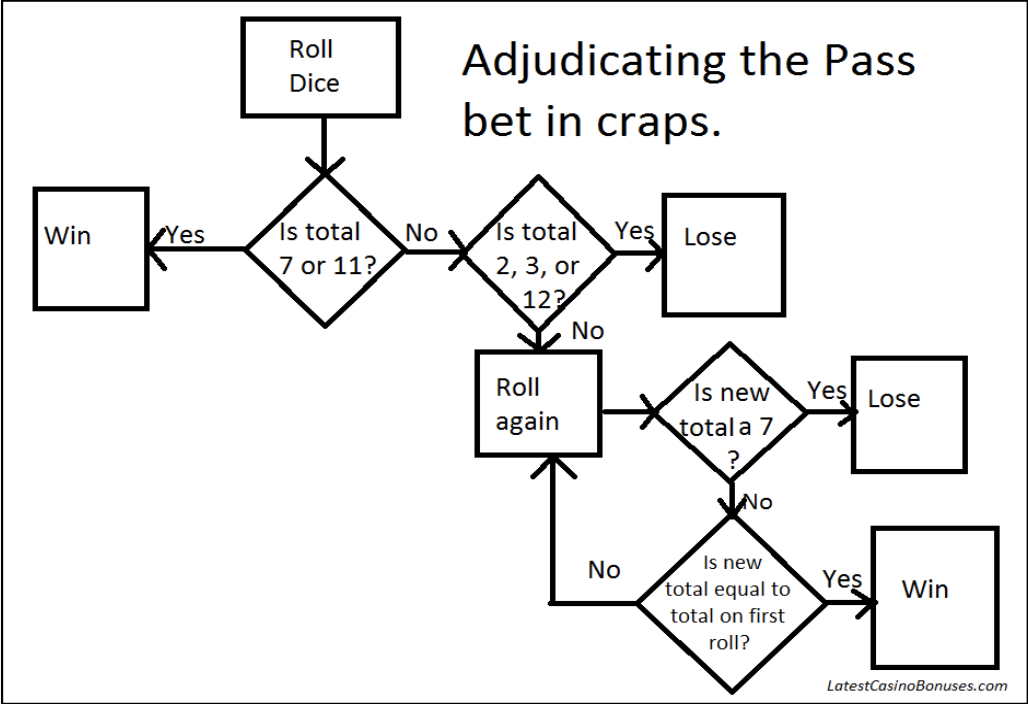

In [87]:
import random

### a.

In [88]:
def diceRoll(num_trials):
    min = 1
    max = 6
    trails_num_dolls = []
    trails_results = []
    
    for i in range(num_trials):
        first_roll_1 = random.randint(min, max)
        first_roll_2 = random.randint(min, max)
        first_roll_sum = first_roll_1 + first_roll_2
        num_dolls = 1
        if first_roll_sum == 7 or first_roll_sum == 11:
            result = 'Win'
        else:
            if first_roll_sum == 2 or first_roll_sum == 3 or first_roll_sum == 12:
                result = 'Lose'
            else:
                while num_dolls >= 1:
                    new_roll_1 = random.randint(min, max)
                    new_roll_2 = random.randint(min, max)
                    new_roll_sum = new_roll_1 + new_roll_2
                    num_dolls += 1
                    if new_roll_sum == 7:
                        result = 'Lose'
                        break
                    else:
                        if new_roll_sum == first_roll_sum:
                            result = 'Win'""
                            break
        trails_num_dolls.append(num_dolls)
        trails_results.append(result)
    return trails_num_dolls, trails_results

In [89]:
trails_num_dolls, trails_results = diceRoll(1)
print('number of dice rolls = ', trails_num_dolls, 'result = ', trails_results)

number of dice rolls =  [8] result =  ['Lose']


### b.

In [90]:
sim = diceRoll(2000)
avg_num_dice_roll = np.average(sim[0])
avg_num_dice_roll

3.295

In [91]:
avg_winnings = sum(map(lambda x : x == 'Win', sim[1]))/len(sim[1])
avg_winnings

0.4775

The number of trials is 2000, we get the average number of dice rolls in a Craps game is 3.2455 and the estimated probability of winning is 0.4835.